### Load libraries

In [1]:
import UrbanSound8K_dataprep as U
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load dataset as dataframe and explore

In [2]:
PATH = "data"
dataset = U.UrbanSoundPrep(PATH)
df = dataset.metadata

In [3]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [4]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [5]:
length = dataset.get_dataset_length()
length

8732

In [6]:
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

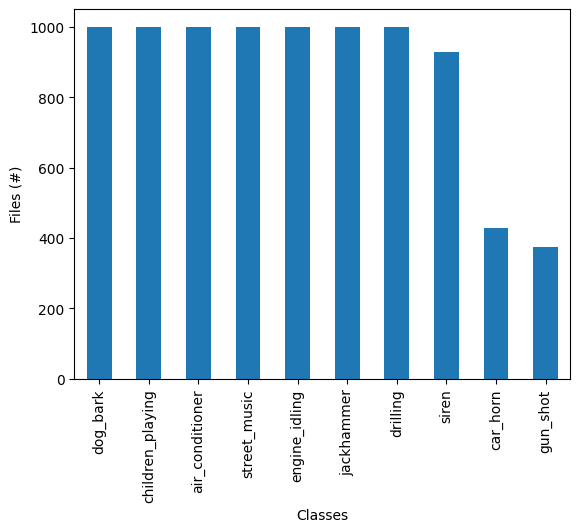

In [7]:
df['class'].value_counts().plot.bar()
plt.xlabel("Classes")
plt.ylabel("Files (#)")
plt.savefig("figures/files_by_classes.png", bbox_inches='tight')

In [8]:
durations = df['end'] - df['start']
durations.describe()

count    8732.000000
mean        3.607904
std         0.973570
min         0.054517
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
dtype: float64

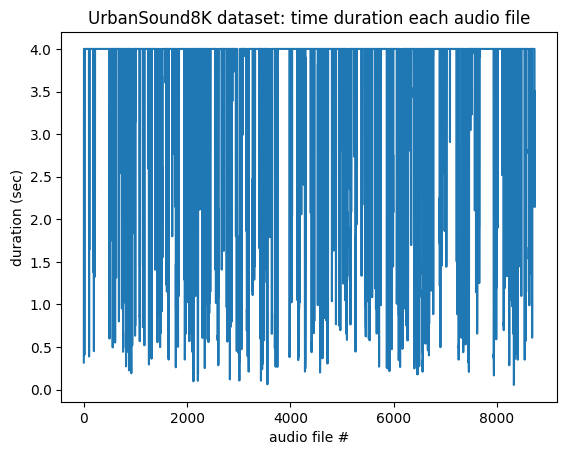

In [9]:
durations.plot()
plt.xlabel("audio file #")
plt.ylabel("duration (sec)")
plt.title("UrbanSound8K dataset: time duration each audio file")
plt.savefig("figures/durations.png", bbox_inches='tight')

In [10]:
durations

0       0.317551
1       4.000000
2       4.000000
3       4.000000
4       4.000000
          ...   
8727    4.000000
8728    2.142545
8729    3.505983
8730    2.532098
8731    2.532099
Length: 8732, dtype: float64

### Check if all files have the same sample rate

In [11]:
sample_rates = []
number_of_channels = []
number_of_samples = []
for i in range(0,length):
    waveform, sample_rate, label = dataset.get_raw_waveform(i)
    
    number_of_channels.append(waveform.shape[0])
    number_of_samples.append(waveform.shape[1])
    sample_rates.append(sample_rate)    

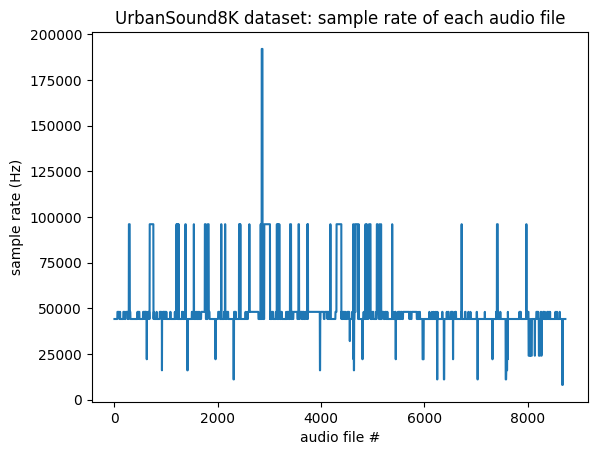

In [12]:
plt.figure()
plt.plot(sample_rates)
plt.xlabel("audio file #")
plt.ylabel("sample rate (Hz)")
plt.title("UrbanSound8K dataset: sample rate of each audio file")
plt.savefig("figures/sample_rates.png", bbox_inches='tight')

In [13]:
np.mean(sample_rates)

48456.97927164452

In [14]:
min(sample_rates)

8000

In [15]:
max(sample_rates)

192000

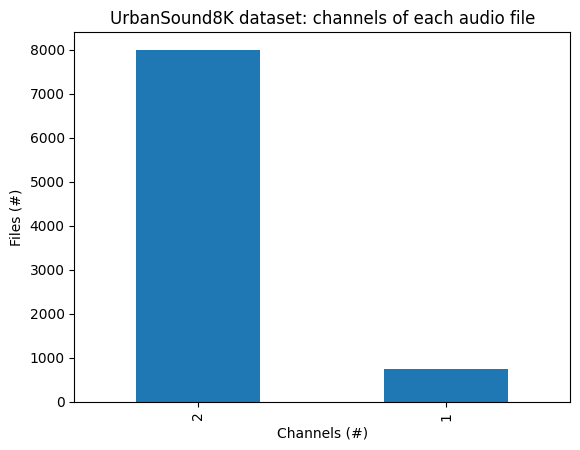

In [16]:
number_of_channels_df = pd.DataFrame()
number_of_channels_df['channels'] = number_of_channels
number_of_channels_df['channels'].value_counts().plot.bar()
plt.xlabel("Channels (#)")
plt.ylabel("Files (#)")

plt.title("UrbanSound8K dataset: channels of each audio file")
plt.savefig("figures/number_of_channels.png", bbox_inches='tight')

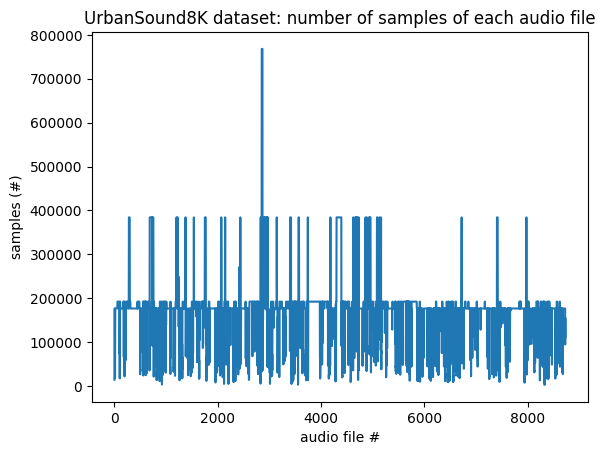

In [17]:
plt.figure()
plt.plot(number_of_samples)
plt.xlabel("audio file #")
plt.ylabel("samples (#)")
plt.title("UrbanSound8K dataset: number of samples of each audio file")
plt.savefig("figures/number_of_samples.png", bbox_inches='tight')

In [18]:
waveform, sample_rate, label = dataset.get_raw_waveform(1)

In [19]:
num_channels, samples = waveform.shape
num_channels

2

In [20]:
samples

176400

### Check process pipeline when up-sampling

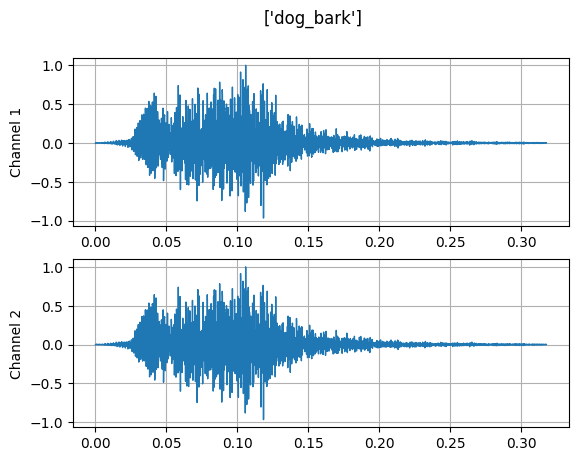

In [21]:
waveform, sample_rate, label = dataset.get_raw_waveform(0)
dataset.plot_waveform(waveform, sample_rate, label)

In [22]:
print("Raw waveform")
print("The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

Raw waveform
The sample_rate is : 44100 and the number of samples is: 14004


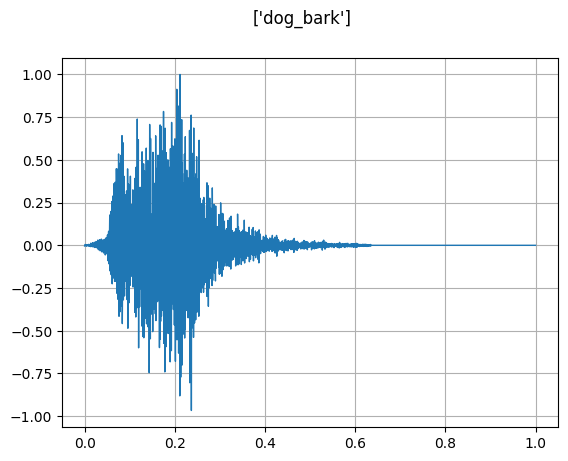

In [23]:
waveform, sample_rate, label = dataset.get_processed_waveform(0)
dataset.plot_waveform(waveform, sample_rate, label)

In [24]:
print("Processed waveform")
print(" The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

Processed waveform
 The sample_rate is : 22050 and the number of samples is: 22050


### Check process pipeline when down-sampling

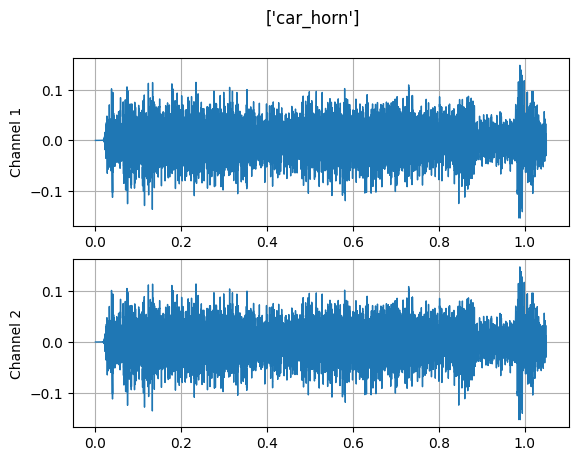

In [25]:
waveform, sample_rate, label = dataset.get_raw_waveform(10)
dataset.plot_waveform(waveform, sample_rate, label)

In [26]:
print("Raw waveform")
print(" The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

Raw waveform
 The sample_rate is : 44100 and the number of samples is: 46305


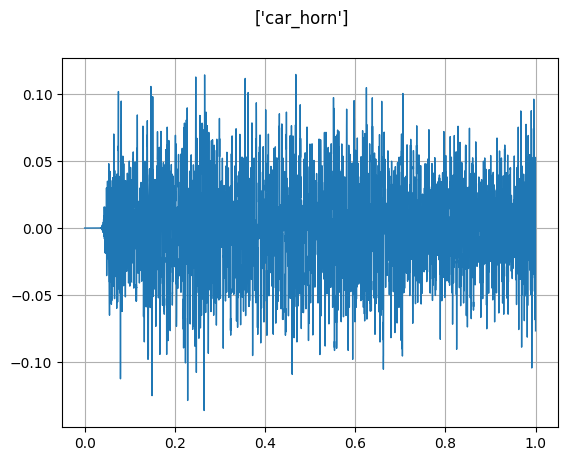

In [27]:
waveform, sample_rate, label = dataset.get_processed_waveform(10)
dataset.plot_waveform(waveform, sample_rate, label)

In [28]:
print("Processed waveform")
print(" The sample_rate is : {} and the number of samples is: {}".format(sample_rate, waveform.shape[1]))

Processed waveform
 The sample_rate is : 22050 and the number of samples is: 22050


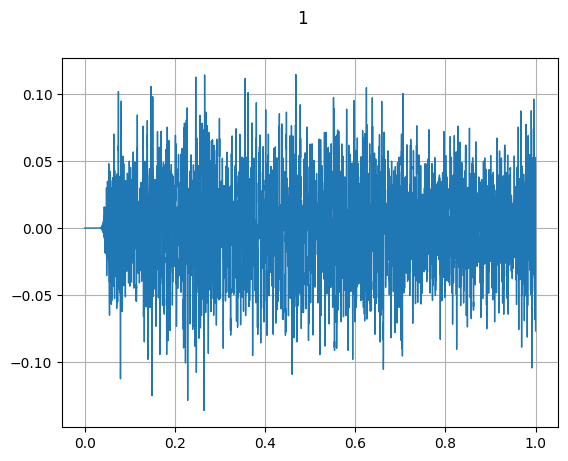

In [29]:
import torch
def plot_spectrogram(waveform, end):
    waveform = waveform[:10]
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(label)

plot_spectrogram(waveform, 22050)

In [30]:
num_of_samples = waveform.shape[1]
num_of_samples

22050

In [31]:
num_of_missing_samples = 22050 - num_of_samples
num_of_missing_samples

0

In [32]:
last_dimension_padding = (0, num_of_missing_samples)
last_dimension_padding

(0, 0)

In [33]:
import torch
waveform = torch.nn.functional.pad(waveform, (0, 8046))

In [34]:
import torch
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
    
print(device)

cpu


### Check resampler

In [35]:
waveform, sample_rate, label = dataset.get_raw_waveform(0)

In [36]:
waveform.shape

torch.Size([2, 14004])

In [37]:
sample_rate

44100

In [38]:
import torchaudio.transforms as T
resampler = T.Resample(sample_rate, 22050)
resampled_waveform = resampler(waveform)

In [39]:
resampled_waveform.shape

torch.Size([2, 7002])

### Some visualizations

In [40]:
labels = dataset.class_mapping

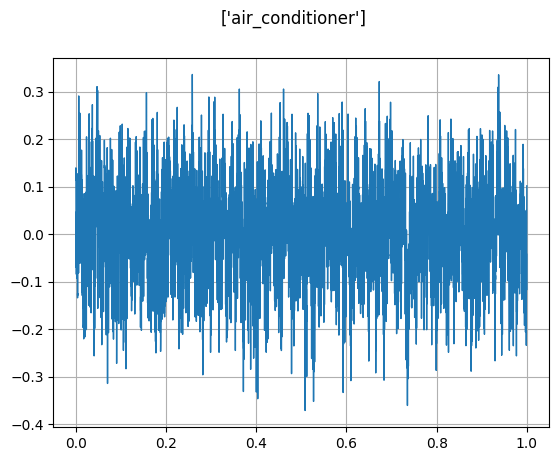

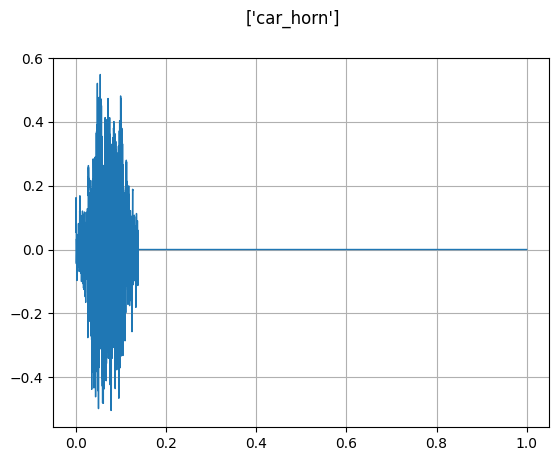

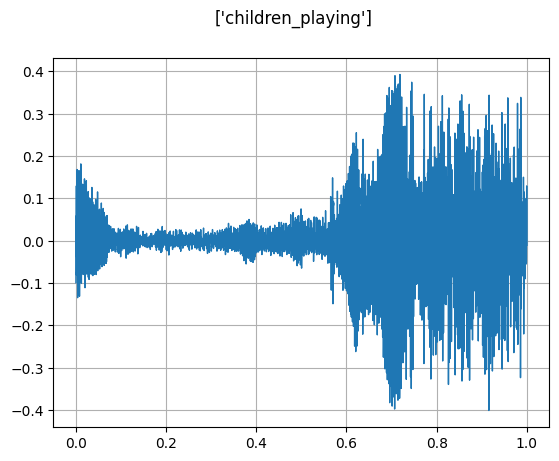

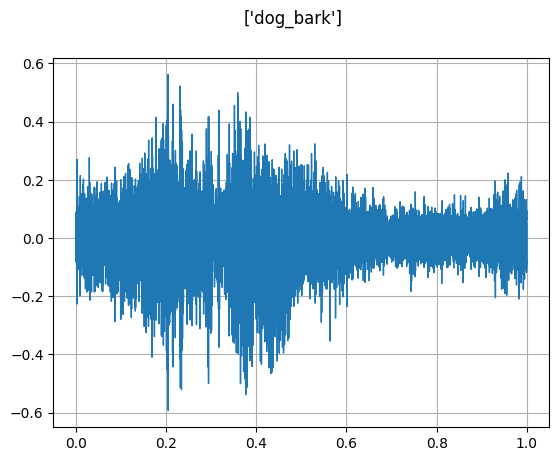

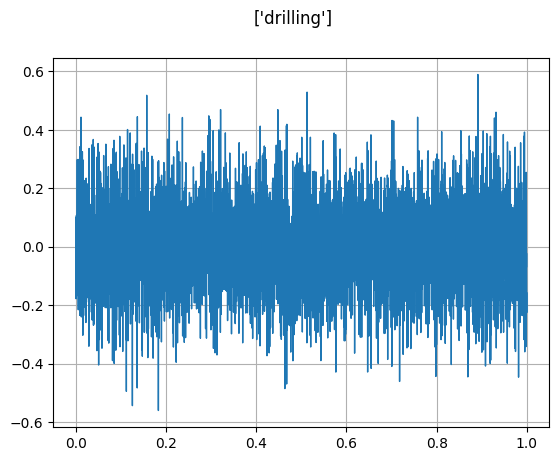

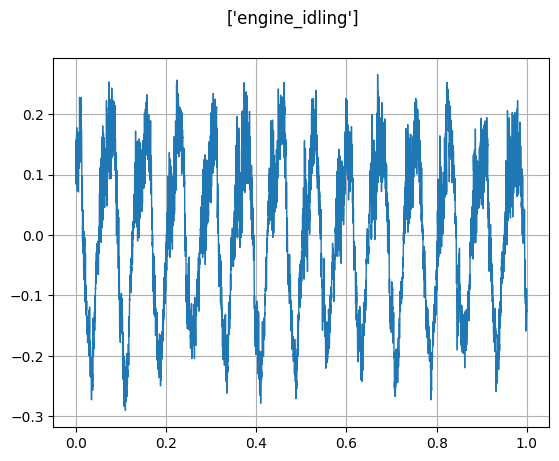

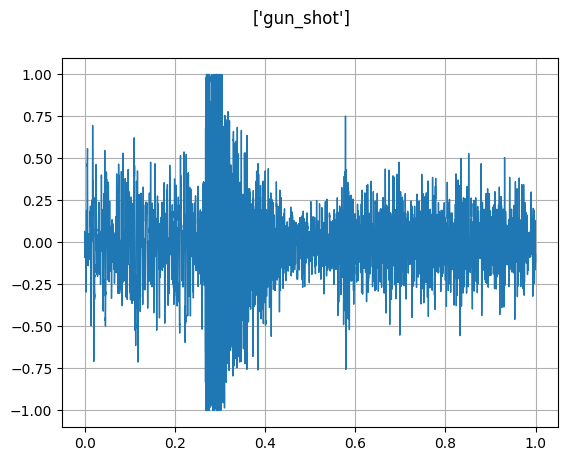

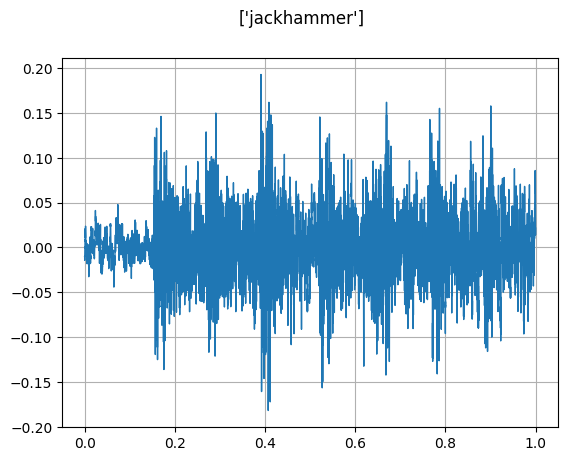

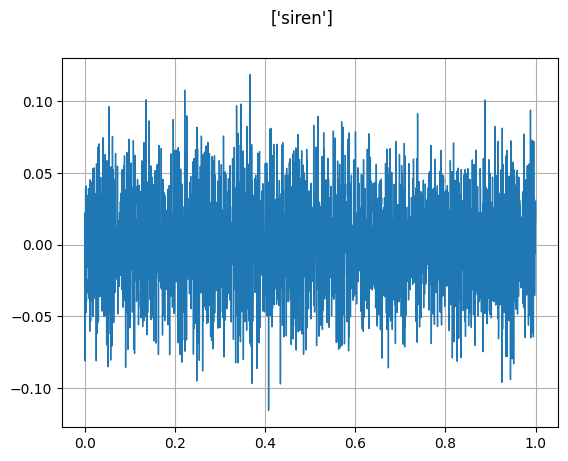

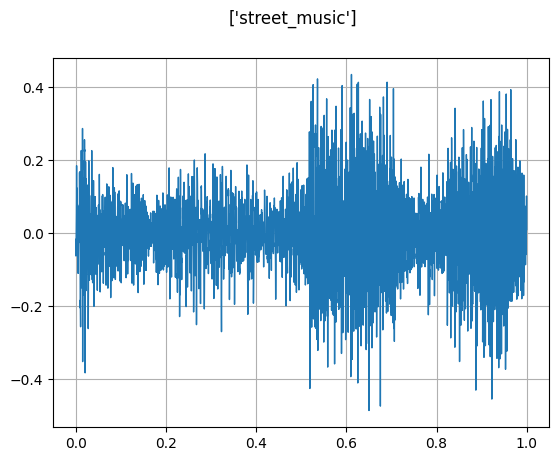

In [41]:
sample_idx = 10
for label in labels.keys():
    index = df.index[df['class']==label].tolist()
    waveform, sample_rate, label = dataset.get_processed_waveform(index[sample_idx])
    dataset.plot_waveform(waveform, sample_rate, label)

C:\Users\alextav\anaconda3\envs\musicAI\lib\site-packages\matplotlib\axes\_axes.py:7720: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


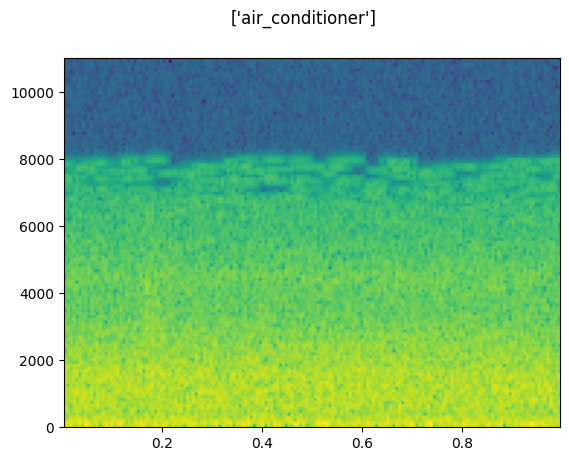

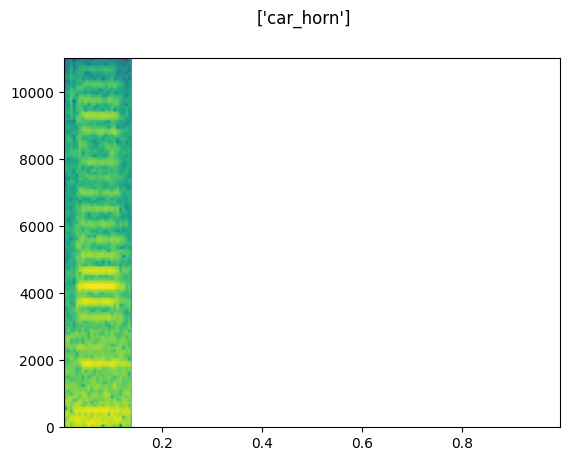

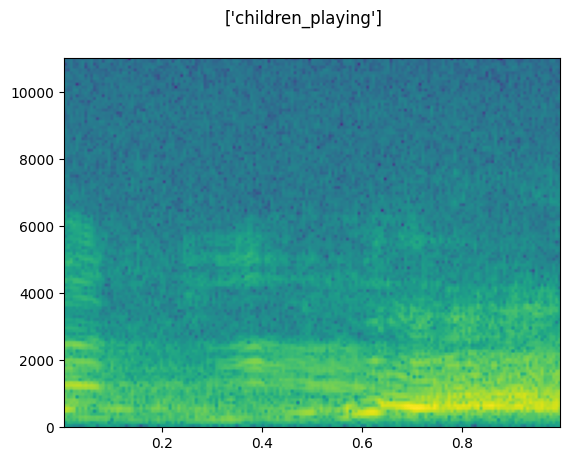

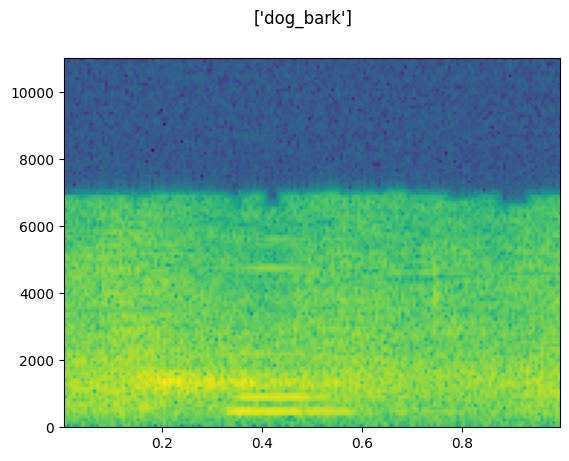

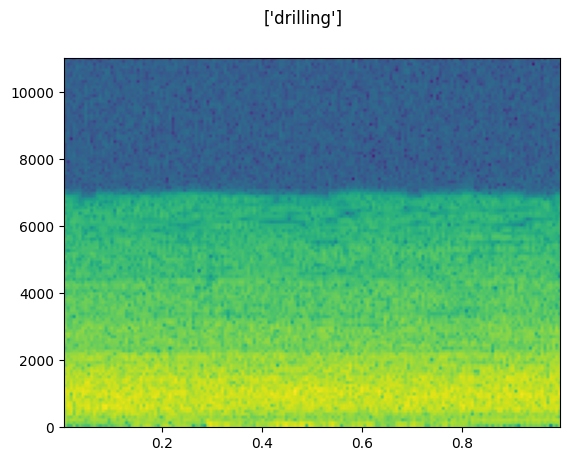

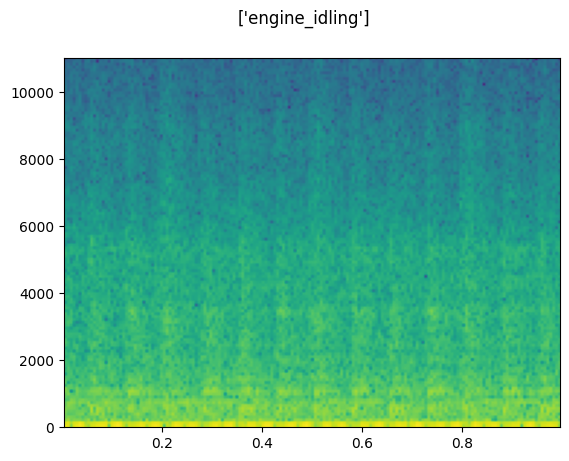

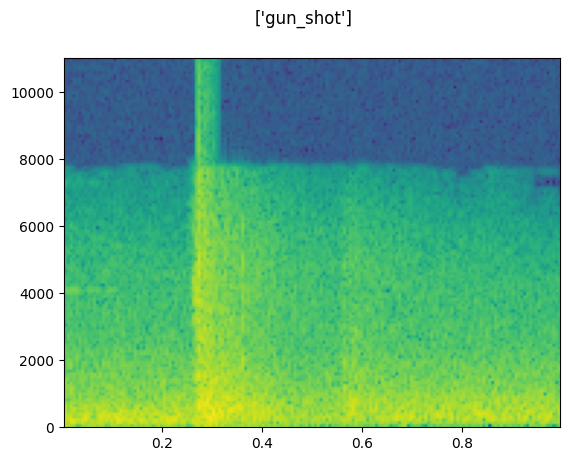

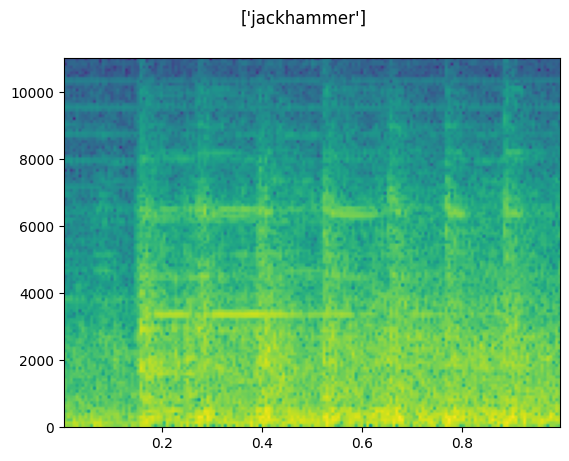

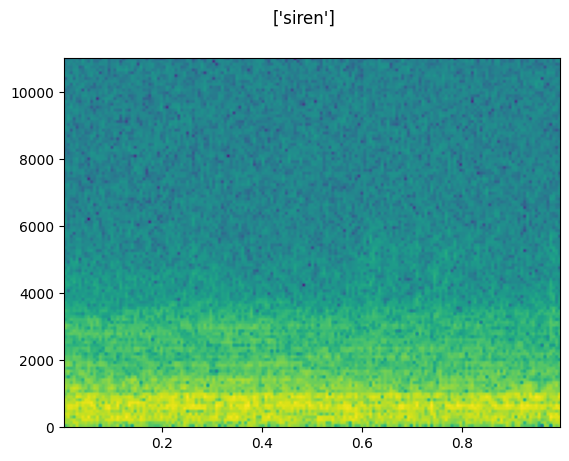

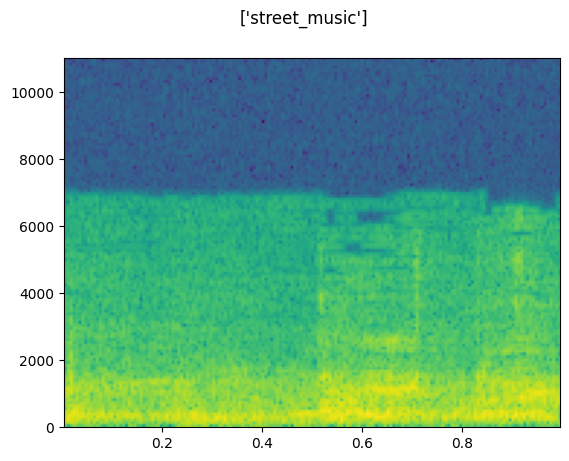

In [42]:
sample_idx = 10
for label in labels.keys():
    index = df.index[df['class']==label].tolist()
    waveform, sample_rate, label = dataset.get_processed_waveform(index[sample_idx])
    mfcc = dataset.calc_mfcc(waveform, sample_rate)
    dataset.plot_spectrogram(waveform, sample_rate, label)